In [1]:
# Import setup
from setup.setup import *

In [2]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Set seaborn theme
sns.set_theme(style = 'darkgrid')

In [4]:
# Load and clean cdl data
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\03 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\setup\setup.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,27301,2024-04-28,Sunday,Simp,Atlanta FaZe,4,Karachi,Hardpoint,29,21,...,1,W,ATL,FaZe,New York Subliners,NYSL,157,407,93,0
4556,27301,2024-04-28,Sunday,HyDra,New York Subliners,4,Karachi,Hardpoint,22,29,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0
4557,27301,2024-04-28,Sunday,KiSMET,New York Subliners,4,Karachi,Hardpoint,17,27,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0
4558,27301,2024-04-28,Sunday,Sib,New York Subliners,4,Karachi,Hardpoint,19,24,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0


In [5]:
# Get all possible map & mode combos
map_and_mode_combos = cdlDF[['gamemode', 'map_name']].drop_duplicates().sort_values(['gamemode', 'map_name']).reset_index(drop = True)
map_and_mode_combos

,gamemode,map_name
0,Hardpoint,6 Star
1,Hardpoint,Invasion
2,Hardpoint,Karachi
3,Hardpoint,Rio
4,Hardpoint,Skidrow
5,Hardpoint,Sub Base
6,Hardpoint,Terminal
7,Hardpoint,Vista
8,Search & Destroy,6 Star
9,Search & Destroy,Highrise


In [94]:
# Check to see if any Map & Mode Combinations are unintenionally excluded from Maps 1 - 3
map_and_mode_combos_1_thru_3 = cdlDF[cdlDF["map_num"] <= 3][['gamemode', 'map_name']].drop_duplicates().sort_values(['gamemode', 'map_name']).reset_index(drop = True)
map_and_mode_combos_1_thru_3

,gamemode,map_name
0,Hardpoint,6 Star
1,Hardpoint,Invasion
2,Hardpoint,Karachi
3,Hardpoint,Rio
4,Hardpoint,Skidrow
5,Hardpoint,Sub Base
6,Hardpoint,Terminal
7,Hardpoint,Vista
8,Search & Destroy,6 Star
9,Search & Destroy,Highrise


In [6]:
# Get cdlDF columns
cdlDF.columns

Index(['match_id', 'match_date', 'match_day', 'player', 'team', 'map_num',
       'map_name', 'gamemode', 'kills', 'deaths', 'kd', 'plus_minus', 'dmg',
       'team_score', 'map_result', 'series_result', 'map_wl', 'team_abbr',
       'team_icon', 'opp', 'opp_abbr', 'opp_score', 'total_score',
       'score_diff', 'dummy_x'],
      dtype='object')

In [7]:
# Test filter cdlDF for Maps 1 - 3 Kill Results for a Single Player
cdlDF[['match_id', 'player', 'map_num', 'map_name', 'gamemode', 'kills', 'score_diff', 'map_wl']] \
[
    (cdlDF['player'] == 'Sib') &
    (cdlDF['map_num'] <= 3)
]

,match_id,player,map_num,map_name,gamemode,kills,score_diff,map_wl
74,27195,Sib,1,Karachi,Hardpoint,19,97,W
82,27195,Sib,2,Highrise,Search & Destroy,7,1,W
90,27195,Sib,3,Karachi,Control,34,-2,L
286,27201,Sib,1,Karachi,Hardpoint,21,2,W
294,27201,Sib,2,Highrise,Search & Destroy,7,1,W
...,...,...,...,...,...,...,...,...
4186,27290,Sib,2,Invasion,Search & Destroy,7,2,W
4194,27290,Sib,3,Invasion,Control,12,-2,L
4534,27301,Sib,1,Rio,Hardpoint,12,-145,L
4542,27301,Sib,2,6 Star,Search & Destroy,5,-1,L


In [8]:
# Compute Maps 1 - 3 Total Kills per Match for Individual Player
sib_maps_1_thru_3_kills = \
    cdlDF[['match_id', 'match_date', 'player', 'map_num', 'map_name', 'gamemode', 'kills', 'score_diff', 'map_wl', 'opp']] \
    [
        (cdlDF['player'] == 'Sib') &
        (cdlDF['map_num'] <= 3)
    ] \
        .groupby(['match_id', 'match_date', 'opp'])['kills'].sum() \
        .reset_index()

sib_maps_1_thru_3_kills

,match_id,match_date,opp,kills
0,27195,2023-12-08,OpTic Texas,60
1,27201,2023-12-10,Los Angeles Guerrillas,51
2,27208,2023-12-16,Las Vegas Legion,39
3,27216,2024-01-12,Minnesota ROKKR,48
4,27223,2024-01-14,Los Angeles Thieves,60
5,27227,2024-01-19,Toronto Ultra,31
6,27233,2024-01-21,Boston Breach,70
7,27236,2024-02-16,Carolina Royal Ravens,57
8,27239,2024-02-17,Seattle Surge,40
9,27243,2024-02-23,Boston Breach,46


Text(0, 0.5, 'Kills')

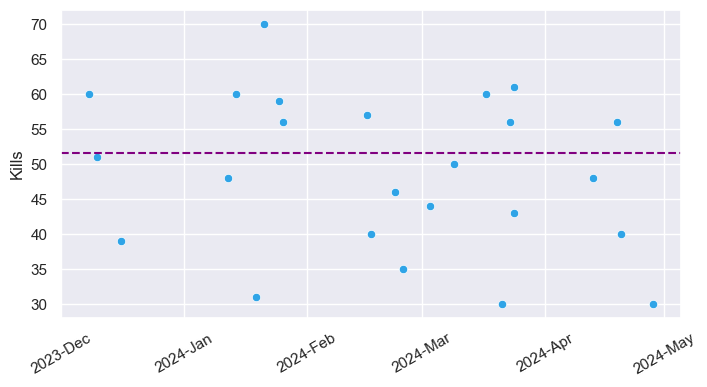

In [9]:
# Plot Results vs Time

# Create figure
fig, axs = plt.subplots(figsize = (8, 4))

# Scatterplot & Cur Line
sns.scatterplot(sib_maps_1_thru_3_kills, x = 'match_date', y = 'kills', color = '#2fa4e7')
cur_line = 51.5
axs.axhline(y = cur_line, color = "purple", linestyle = '--')

# Date Ticks
formatter = mdates.DateFormatter('%Y-%b')
axs.xaxis.set_major_formatter(formatter)
axs.tick_params(axis = 'x', rotation = 30)

# X- & Y-Axis Labels
axs.set_xlabel("")
axs.set_ylabel("Kills")

In [10]:
# Filter maps from cdlDF
updated_cdl_DF = filter_maps(cdlDF).copy()
updated_cdl_DF

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,27301,2024-04-28,Sunday,Simp,Atlanta FaZe,4,Karachi,Hardpoint,29,21,...,1,W,ATL,FaZe,New York Subliners,NYSL,157,407,93,0
3452,27301,2024-04-28,Sunday,HyDra,New York Subliners,4,Karachi,Hardpoint,22,29,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0
3453,27301,2024-04-28,Sunday,KiSMET,New York Subliners,4,Karachi,Hardpoint,17,27,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0
3454,27301,2024-04-28,Sunday,Sib,New York Subliners,4,Karachi,Hardpoint,19,24,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0


In [11]:
# Check to see if cdlDF is unchanged
cdlDF

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,27301,2024-04-28,Sunday,Simp,Atlanta FaZe,4,Karachi,Hardpoint,29,21,...,1,W,ATL,FaZe,New York Subliners,NYSL,157,407,93,0
4556,27301,2024-04-28,Sunday,HyDra,New York Subliners,4,Karachi,Hardpoint,22,29,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0
4557,27301,2024-04-28,Sunday,KiSMET,New York Subliners,4,Karachi,Hardpoint,17,27,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0
4558,27301,2024-04-28,Sunday,Sib,New York Subliners,4,Karachi,Hardpoint,19,24,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0


In [12]:
# For a single player, compute median kills per map & mode
sib_median_kills_by_map_and_mode = \
    updated_cdl_DF \
    [['match_id', 'match_date', 'player', 'map_num', 'map_name', 'gamemode', 'kills', 'score_diff', 'map_wl', 'opp']] \
    [(updated_cdl_DF['player'] == 'Sib')] \
        .groupby(['gamemode', 'map_name'], observed = True)['kills'].median() \
        .reset_index()

sib_median_kills_by_map_and_mode

,gamemode,map_name,kills
0,Hardpoint,Karachi,21.0
1,Hardpoint,Rio,24.0
2,Hardpoint,Sub Base,23.5
3,Hardpoint,Vista,19.0
4,Search & Destroy,6 Star,5.0
5,Search & Destroy,Highrise,7.0
6,Search & Destroy,Invasion,5.5
7,Search & Destroy,Karachi,4.0
8,Search & Destroy,Rio,9.0
9,Control,Highrise,22.5


<Axes: xlabel='map_name', ylabel='gamemode'>

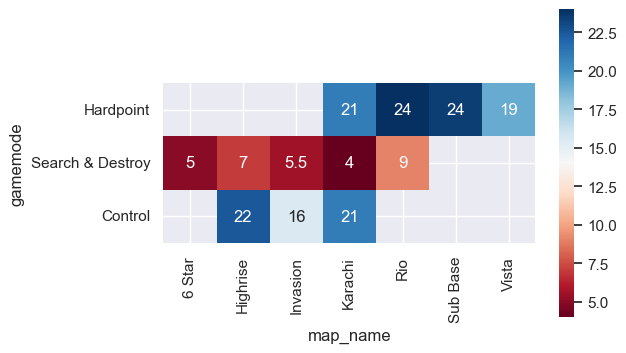

In [13]:
# Sib Heatmap of Kills by Map & Mode

# Create figure
fig, axs = plt.subplots(figsize = (6, 4))

# Pivot data for plotting
pivot_df = sib_median_kills_by_map_and_mode.pivot(index = 'gamemode', columns = 'map_name', values = 'kills')

# Heatmap
sns.heatmap(data = pivot_df, annot = True, square = True, cmap = "RdBu")

In [14]:
# Filter updated_cdl_DF for Sib
sib_df = updated_cdl_DF[updated_cdl_DF["player"] == "Sib"]

sib_df

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
50,27195,2023-12-08,Friday,Sib,New York Subliners,1,Karachi,Hardpoint,19,20,...,1,W,NYSL,Subliners,OpTic Texas,TX,153,403,97,0
58,27195,2023-12-08,Friday,Sib,New York Subliners,2,Highrise,Search & Destroy,7,10,...,1,W,NYSL,Subliners,OpTic Texas,TX,5,11,1,0
66,27195,2023-12-08,Friday,Sib,New York Subliners,3,Karachi,Control,34,25,...,1,L,NYSL,Subliners,OpTic Texas,TX,3,4,-2,0
166,27201,2023-12-10,Sunday,Sib,New York Subliners,1,Karachi,Hardpoint,21,22,...,1,W,NYSL,Subliners,Los Angeles Guerrillas,LAG,248,498,2,0
174,27201,2023-12-10,Sunday,Sib,New York Subliners,2,Highrise,Search & Destroy,7,8,...,1,W,NYSL,Subliners,Los Angeles Guerrillas,LAG,5,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,27290,2024-04-20,Saturday,Sib,New York Subliners,4,Vista,Hardpoint,19,30,...,0,L,NYSL,Subliners,Seattle Surge,SEA,250,444,-56,0
3430,27301,2024-04-28,Sunday,Sib,New York Subliners,1,Rio,Hardpoint,12,22,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,355,-145,0
3438,27301,2024-04-28,Sunday,Sib,New York Subliners,2,6 Star,Search & Destroy,5,8,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,6,11,-1,0
3446,27301,2024-04-28,Sunday,Sib,New York Subliners,3,Highrise,Control,13,13,...,0,W,NYSL,Subliners,Atlanta FaZe,ATL,0,3,3,0


<Axes: xlabel='map_name', ylabel='kills'>

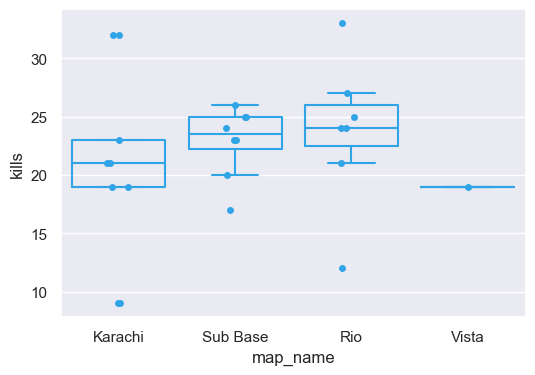

In [15]:
# Sib Box Plot of Kills by Map: Hardpoint

# Create figure
fig, axs = plt.subplots(figsize = (6, 4))

# Box Plot
sns.boxplot(data = sib_df[sib_df["gamemode"] == "Hardpoint"], 
            x = "map_name", y = "kills", fill = False, showfliers = False, color = "#2fa4e7")
sns.stripplot(data = sib_df[sib_df["gamemode"] == "Hardpoint"], 
              x = "map_name", y = "kills", jitter = 0.1, color = "#2fa4e7")

<Axes: xlabel='map_name', ylabel='kills'>

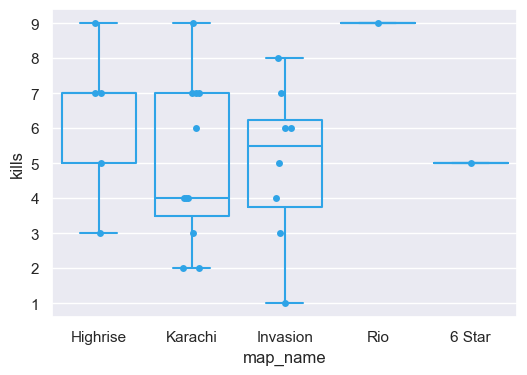

In [16]:
# Sib Box Plot of Kills by Map: Search & Destroy

# Create figure
fig, axs = plt.subplots(figsize = (6, 4))

# Box Plot
sns.boxplot(data = sib_df[sib_df["gamemode"] == "Search & Destroy"], 
            x = "map_name", y = "kills", fill = False, showfliers = False, color = "#2fa4e7")
sns.stripplot(data = sib_df[sib_df["gamemode"] == "Search & Destroy"], 
              x = "map_name", y = "kills", jitter = 0.1, color = "#2fa4e7")

<Axes: xlabel='map_name', ylabel='kills'>

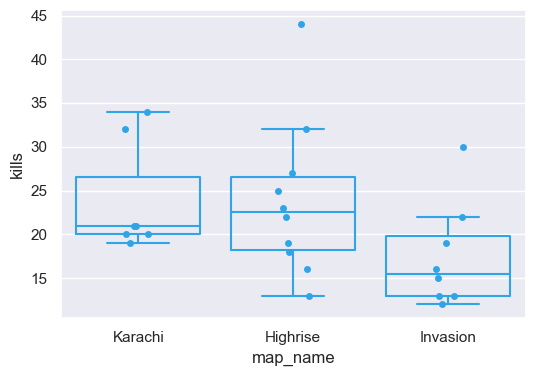

In [17]:
# Sib Box Plot of Kills by Map: Control

# Create figure
fig, axs = plt.subplots(figsize = (6, 4))

# Box Plot
sns.boxplot(data = sib_df[sib_df["gamemode"] == "Control"], 
            x = "map_name", y = "kills", fill = False, showfliers = False, color = "#2fa4e7")
sns.stripplot(data = sib_df[sib_df["gamemode"] == "Control"], 
              x = "map_name", y = "kills", jitter = 0.1, color = "#2fa4e7")

In [18]:
# Filter updated_cdl_DF for Sib on selected mapset
sib_df = updated_cdl_DF[
    (updated_cdl_DF["player"] == "Sib") & (
    ((updated_cdl_DF["gamemode"] == "Hardpoint") & (updated_cdl_DF["map_name"] == "Karachi")) |
    ((updated_cdl_DF["gamemode"] == "Search & Destroy") & (updated_cdl_DF["map_name"] == "Karachi")) |
    ((updated_cdl_DF["gamemode"] == "Control") & (updated_cdl_DF["map_name"] == "Karachi"))
    )
]

sib_df

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
50,27195,2023-12-08,Friday,Sib,New York Subliners,1,Karachi,Hardpoint,19,20,...,1,W,NYSL,Subliners,OpTic Texas,TX,153,403,97,0
66,27195,2023-12-08,Friday,Sib,New York Subliners,3,Karachi,Control,34,25,...,1,L,NYSL,Subliners,OpTic Texas,TX,3,4,-2,0
166,27201,2023-12-10,Sunday,Sib,New York Subliners,1,Karachi,Hardpoint,21,22,...,1,W,NYSL,Subliners,Los Angeles Guerrillas,LAG,248,498,2,0
198,27201,2023-12-10,Sunday,Sib,New York Subliners,5,Karachi,Search & Destroy,7,6,...,1,W,NYSL,Subliners,Los Angeles Guerrillas,LAG,4,10,2,0
310,27208,2023-12-16,Saturday,Sib,New York Subliners,3,Karachi,Control,20,18,...,1,W,NYSL,Subliners,Las Vegas Legion,LV,1,4,2,0
446,27216,2024-01-12,Friday,Sib,New York Subliners,2,Karachi,Search & Destroy,9,4,...,1,W,NYSL,Subliners,Minnesota ROKKR,MIN,3,9,3,0
574,27223,2024-01-14,Sunday,Sib,New York Subliners,4,Karachi,Hardpoint,32,17,...,1,W,NYSL,Subliners,Los Angeles Thieves,LAT,214,464,36,0
626,27227,2024-01-19,Friday,Sib,New York Subliners,1,Karachi,Hardpoint,9,17,...,0,L,NYSL,Subliners,Toronto Ultra,TOR,250,342,-158,0
634,27227,2024-01-19,Friday,Sib,New York Subliners,2,Karachi,Search & Destroy,2,7,...,0,L,NYSL,Subliners,Toronto Ultra,TOR,6,7,-5,0
642,27227,2024-01-19,Friday,Sib,New York Subliners,3,Karachi,Control,20,19,...,0,L,NYSL,Subliners,Toronto Ultra,TOR,3,4,-2,0


<Axes: xlabel='gamemode', ylabel='kills'>

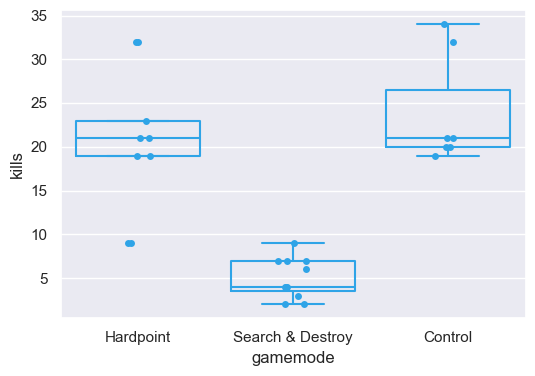

In [19]:
# Sib Box Plot of Kills for Specific Mapset

# Create figure
fig, axs = plt.subplots(figsize = (6, 4))

# Box Plot
sns.boxplot(data = sib_df, x = "gamemode", y = "kills", fill = False, showfliers = False, color = "#2fa4e7")
sns.stripplot(data = sib_df, x = "gamemode", y = "kills", jitter = 0.1, color = "#2fa4e7")

In [ ]:
# Useful Stats
# 1. O/U %
# 2. O/U Streak
# 3. Box Plots of Kills by Series Results
# 4. Scatter Plot or Box Plots of Kills by Number of Maps Won in Maps 1 - 3
# 5. Conditional Probability of O/U when Map is Included in Series
# 6. Total Number of Matches
# 7. Most Popular Maps (especially HP & SnD)
# 8. Distribution of HP & SnD Maps Played within Maps 1 - 3 vs Maps 4 - 5

In [30]:
# Compute Total Number of Matches
number_of_matches = len(cdlDF["match_id"].unique())
number_of_matches

145

In [83]:
# Ratio of Map 1s to Map 4s
map_1s = len(cdlDF[cdlDF["map_num"] == 1]["match_id"].unique())
map_4s = len(cdlDF[cdlDF["map_num"] == 4]["match_id"].unique())

print(f"Map 1s   Map 4s   Ratio")
print(f"{map_1s}      {map_4s}       {map_1s / map_4s:.2f}")

Map 1s   Map 4s   Ratio
145      92       1.58


In [86]:
# Ratio of Map 2s to Map 5s
map_2s = len(cdlDF[cdlDF["map_num"] == 2]["match_id"].unique())
map_5s = len(cdlDF[cdlDF["map_num"] == 5]["match_id"].unique())

print(f"Map 2s   Map 5s   Ratio")
print(f"{map_2s}      {map_5s}       {map_2s / map_5s:.2f}")

Map 2s   Map 5s   Ratio
145      43       3.37


In [90]:
# Ratio of Map 1s to Map 4s after filtering for maps
map_1s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 1]["match_id"].unique())
map_4s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 4]["match_id"].unique())

print(f"Map 1s   Map 4s   Ratio")
print(f"{map_1s}       {map_4s}       {map_1s / map_4s:.2f}")

Map 1s   Map 4s   Ratio
87       52       1.67


In [88]:
# Ratio of Maps 2s to Map 5s after filtering for maps
map_2s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 2]["match_id"].unique())
map_5s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 5]["match_id"].unique())

print(f"Map 2s   Map 5s   Ratio")
print(f"{map_2s}      {map_5s}       {map_2s / map_5s:.2f}")

Map 2s   Map 5s   Ratio
115      33       3.48


In [92]:
# Ratio of Map 1s to Map 4s: Stage 3 Only

queried_df = cdlDF[cdlDF["match_date"] >= np.datetime64('2024-04-12')]

map_1s = len(queried_df[queried_df["map_num"] == 1]["match_id"].unique())
map_4s = len(queried_df[queried_df["map_num"] == 4]["match_id"].unique())

print(f"Map 1s   Map 4s   Ratio")
print(f"{map_1s}       {map_4s}       {map_1s / map_4s:.2f}")

Map 1s   Map 4s   Ratio
25       16       1.56


In [93]:
# Ratio of Map 1s to Map 4s: Stage 3 Only

queried_df = cdlDF[cdlDF["match_date"] >= np.datetime64('2024-04-12')]

map_2s = len(queried_df[queried_df["map_num"] == 2]["match_id"].unique())
map_5s = len(queried_df[queried_df["map_num"] == 5]["match_id"].unique())

print(f"Map 2s   Map 5s   Ratio")
print(f"{map_2s}       {map_5s}       {map_2s / map_5s:.2f}")

Map 2s   Map 5s   Ratio
25       9       2.78


In [35]:
# Query updated_cdl_DF to get dataframe of maps & modes
queried_df = updated_cdl_DF[["match_id", "gamemode", "map_name"]].drop_duplicates()
queried_df

,match_id,gamemode,map_name
0,27193,Hardpoint,Karachi
8,27193,Search & Destroy,Karachi
16,27193,Control,Invasion
24,27193,Search & Destroy,Invasion
32,27194,Hardpoint,Karachi
...,...,...,...
3416,27300,Hardpoint,Karachi
3424,27301,Hardpoint,Rio
3432,27301,Search & Destroy,6 Star
3440,27301,Control,Highrise


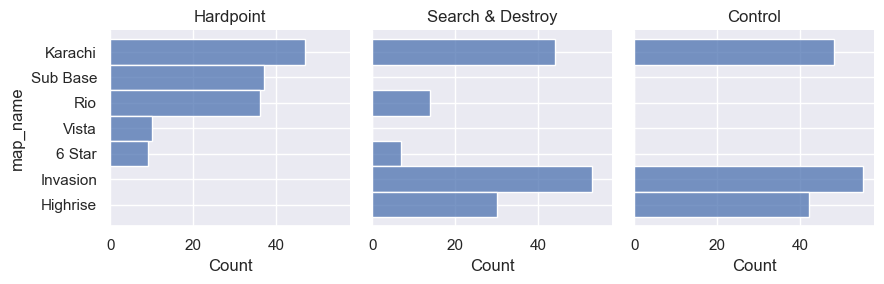

In [41]:
# Visualize Map & Mode Popularity

# Initialize facets
p = sns.FacetGrid(queried_df, col = "gamemode")

# Plot the faceted bar charts
p.map_dataframe(sns.histplot, y = "map_name", discrete = True)

# Set facet titles
p.set_titles("{col_name}")


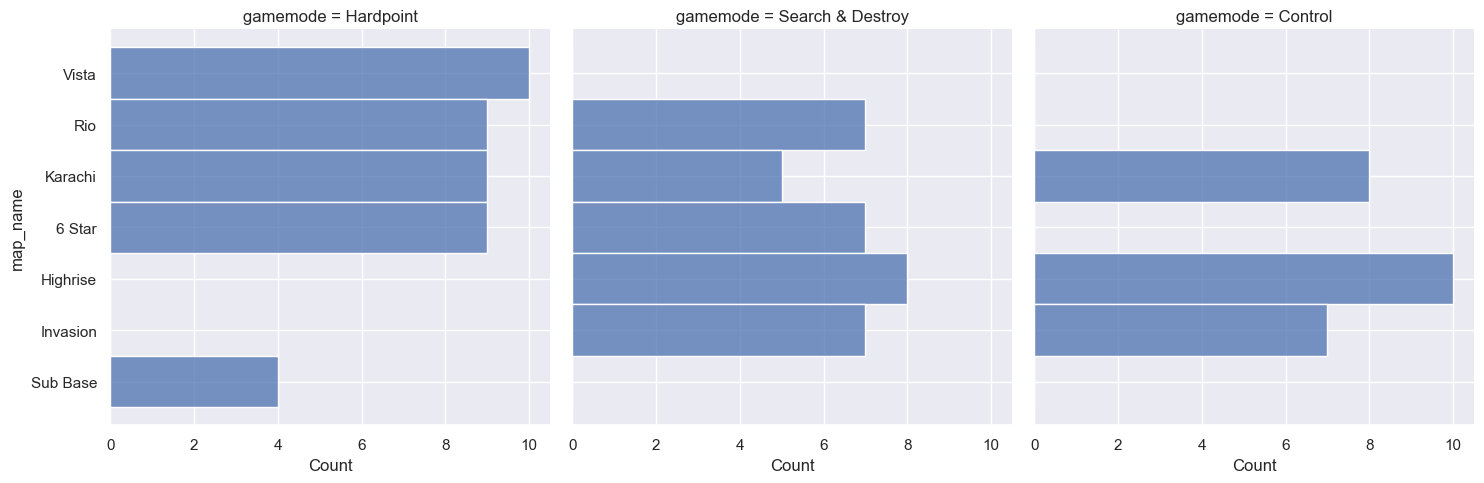

In [45]:
# Repeat analysis, but filter for Stage 3 Only
queried_df = updated_cdl_DF[
    updated_cdl_DF["match_date"] >= np.datetime64('2024-04-12')
    ][["match_id", "gamemode", "map_name"]].drop_duplicates()

# Plot the faceted bar charts
sns.displot(queried_df, y = "map_name", col = "gamemode", discrete = True)

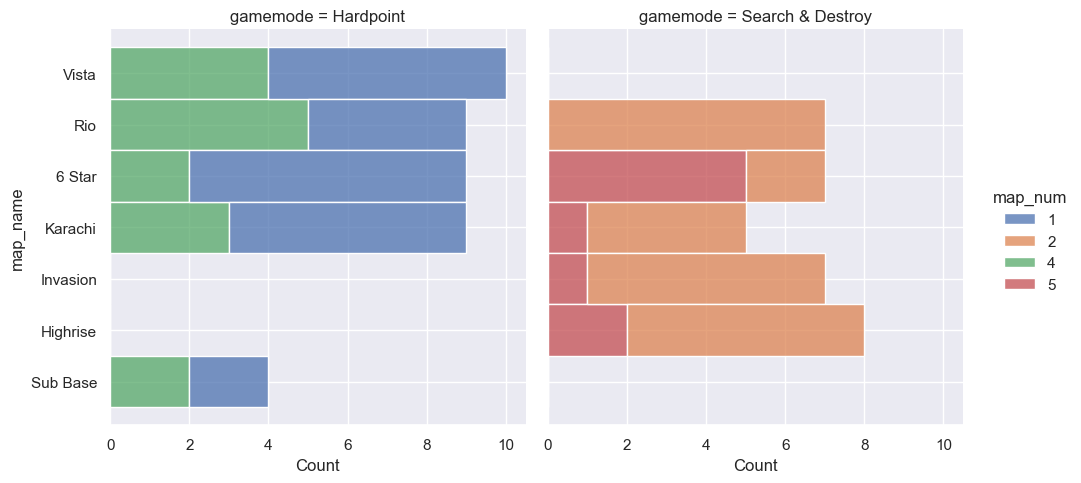

In [58]:
# Evaluate distribution of HP & SnD Maps Across Maps 1 - 2 vs Maps 4 - 5: Stage 3 Only
queried_df = updated_cdl_DF[
    (updated_cdl_DF["match_date"] >= np.datetime64('2024-04-12')) &
    (updated_cdl_DF["gamemode"] != "Control")
    ][["match_id", "gamemode", "map_name", "map_num"]] \
        .drop_duplicates()

# Plot the faceted bar charts
sns.displot(queried_df, y = "map_name", col = "gamemode", 
            hue = "map_num", palette = "deep", multiple = "stack",
            col_order = ['Hardpoint', 'Search & Destroy'], discrete = True)

In [95]:
# Maps 1 - 3 Kills for every Player & Series
maps_1_thru_3_df = cdlDF[
    ['match_id', 'match_date', 'player', 'map_num', 'map_name', 'gamemode', 'kills', 'score_diff', 'map_wl', 'opp']
    ] \
    [(cdlDF['map_num'] <= 3)] \
        .groupby(['match_id', 'player', 'match_date', 'opp'])['kills'].sum() \
        .reset_index()

maps_1_thru_3_df

,match_id,player,match_date,opp,kills
0,27193,Capsidal,2023-12-08,Atlanta FaZe,58
1,27193,Cellium,2023-12-08,Boston Breach,45
2,27193,Drazah,2023-12-08,Boston Breach,51
3,27193,Priestahh,2023-12-08,Atlanta FaZe,38
4,27193,Simp,2023-12-08,Boston Breach,72
...,...,...,...,...,...
1155,53374,Kenny,2024-03-24,Atlanta FaZe,77
1156,53374,Pred,2024-03-24,Atlanta FaZe,51
1157,53374,Shotzzy,2024-03-24,Atlanta FaZe,56
1158,53374,Simp,2024-03-24,OpTic Texas,74


In [108]:
# Function to get list of match_ids containing user-selected map & mode for user-selected player
def get_match_ids(
    cdlDF_input: pd.DataFrame, player_input: str, 
    gamemode_input: str, map_input = str
):
    player_match_ids = cdlDF_input[
        (cdlDF_input['map_num'] <= 3) &
        (cdlDF_input['player'] == player_input) &
        (cdlDF_input['gamemode'] == gamemode_input) &
        (cdlDF_input['map_name'] == map_input)
    ][['match_id']]

    return player_match_ids['match_id'].to_list()

In [112]:
get_match_ids(updated_cdl_DF, "Simp", "Hardpoint", "6 Star")

[27284, 27293]

In [130]:
# Conditional Probability of O/U when Map is Included in Series
def compute_ou_prob(     
    cdlDF_input: pd.DataFrame, player_input: str, 
    gamemode_input: str, cur_line: float, map_input = str
):
    player_match_ids = get_match_ids(cdlDF_input, player_input, gamemode_input, map_input)
    queried_df = cdlDF_input[
        (cdlDF_input['map_num'] <= 3) &
        (cdlDF_input['player'] == player_input) &
        (cdlDF_input['match_id'].isin(player_match_ids))
    ].groupby('match_id')['kills'].sum().reset_index()

    # Compute overs, unders, and hooks
    overs = len(queried_df[queried_df['kills'] > cur_line])
    unders = len(queried_df[queried_df['kills'] < cur_line])
    hooks = len(queried_df[queried_df['kills'] == cur_line])

    # Compute over & under percentages
    over_percentage = int(round((overs / len(queried_df) * 100), 0))
    under_percentage = int(round((unders / len(queried_df) * 100), 0))
    
    # Return recommended bet based on percentages
    if over_percentage >= under_percentage:
        return "Over", str(over_percentage), str(overs), str(unders), str(hooks)
    else:
        return "Under", str(under_percentage), str(overs), str(unders), str(hooks)

In [135]:
compute_ou_prob(updated_cdl_DF, "Nero", "Hardpoint", 52, "6 Star")

('Over', '100', '2', '0', '0')